# Instructions

The places where you have enter code, to answer the questions, are marked with `# YOUR CODE HERE`.

In [1]:
!pip install dwave-ocean-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 320.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2

## Question 1 (6 points)

Given the following QUBO, complete the function `create_bqm` so that it returns the corresponding BQM.

$$- 7x_1 - 2x_2 - 10x_3 - 4x_4 + 5x_1x_2 + 3x_1x_3 + 6x_2x_3 - 8x_3x_4 - 2$$


The function `create_bqm` has

- Input: None
- Returns:
    - A BQM instance


In [2]:
from dimod import BQM

def create_bqm():
    # YOUR CODE HERE


    vartype = 'BINARY'
    linear = {'x1': -7, 'x2': -2, 'x3': -10, 'x4': -4}
    quadratic = {('x1', 'x2'): 5, ('x1', 'x3'): 3, ('x2', 'x3'): 6, ('x3', 'x4'): -8}

    offset = -2


    bqm = BQM(linear, quadratic, offset, vartype)

    # Do not modify anything below this line
    return bqm

In [3]:
# You can use this cell to call and check the output of the function

print(create_bqm())

BinaryQuadraticModel({'x1': -7.0, 'x2': -2.0, 'x3': -10.0, 'x4': -4.0}, {('x2', 'x1'): 5.0, ('x3', 'x1'): 3.0, ('x3', 'x2'): 6.0, ('x4', 'x3'): -8.0}, -2.0, 'BINARY')


In [4]:
# hidden tests will be used for grading.

## Question 2 (6 points)

Function `solve_Q` takes as input a matrix representation of a QUBO formulation. Complete the function `solve_Q` so that it returns the solution to the given problem. Use D-Wave's `ExactSolver()`.


The function `solve_Q` has

- Input:
    - Q matrix representation of QUBO as an `numpy.array`.
- Returns:
    - Sample with the lowest energy (first sample of the SampleSet)


In [5]:
from dimod import BQM


def solve_Q(Q):
    # YOUR CODE HERE
     Q_dict = {}
     for i in range(Q.shape[0]):
        for j in range(i, Q.shape[1]):
            Q_dict[(i, j)] = Q[i, j]


     bqm = BQM.from_qubo(Q_dict)


     solver = ExactSolver()
     sampleset = solver.sample(bqm)
     sample_dict = sampleset.first.sample



     sample_array = np.array([sample_dict[i] for i in range(len(sample_dict))])




    # Do not modify anything below this line
     return sampleset.first

In [6]:
# You can use this cell to call and check the output of the function
import numpy as np
from dimod.reference.samplers import ExactSolver


Q = np.array([[1, 1], [0, 1]])
print(solve_Q(Q))

Sample(sample={0: 0, 1: 0}, energy=0.0, num_occurrences=1)


In [7]:
# hidden tests will be used for grading.

## Question 3 (6 points)

You are given a graph $G$ in the next cell where the nodes are labeled $0,1,\dots,8$. Create a BQM with `SPIN` variables to solve Max-Cut problem for the given graph. Variables should be named with the name of the correspoding node.

The function `max_cut` has

- Input: None
- Returns:
    - BQM with SPIN variables for graph `G`


EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)])

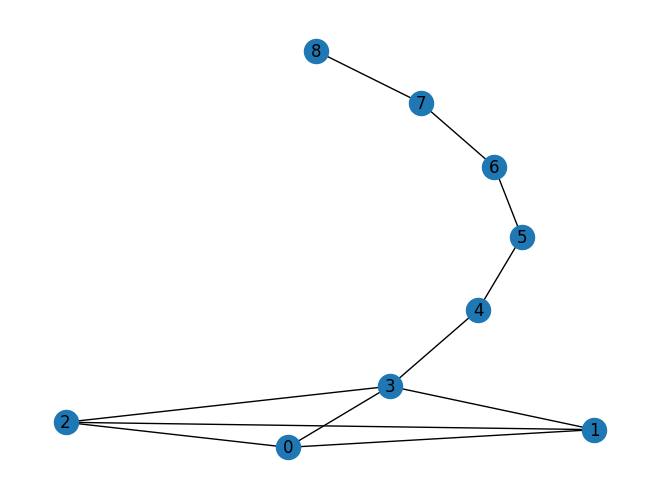

In [8]:
import networkx as nx

G = nx.lollipop_graph(4, 5)
nx.draw(G, with_labels=True)
G.edges

In [9]:
from dimod import BQM


def max_cut():
    # YOUR CODE HERE
    bqm = BQM('SPIN')


    for node in G.nodes:
        bqm.add_variable(node, 0)

    for edge in G.edges:
        u, v = edge
        bqm.add_interaction(u, v, 1)
    # Do not modify anything below this line
    return bqm

In [10]:
# You can use this cell to call and check the output of the function
print(max_cut())

BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, {(1, 0): 1.0, (2, 0): 1.0, (2, 1): 1.0, (3, 0): 1.0, (3, 1): 1.0, (3, 2): 1.0, (4, 3): 1.0, (5, 4): 1.0, (6, 5): 1.0, (7, 6): 1.0, (8, 7): 1.0}, 0.0, 'SPIN')


In [11]:
# hidden tests will be used for grading.
# If this cell results in an error, your implementation is incorrect